In [1]:
# MOGALAPU JAYA SRIKAR - 20BCE2041

In [146]:
# MOGALAPU JAYA SRIKAR - 20BCE2041

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drug200.csv')

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [7]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [8]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<Axes: >

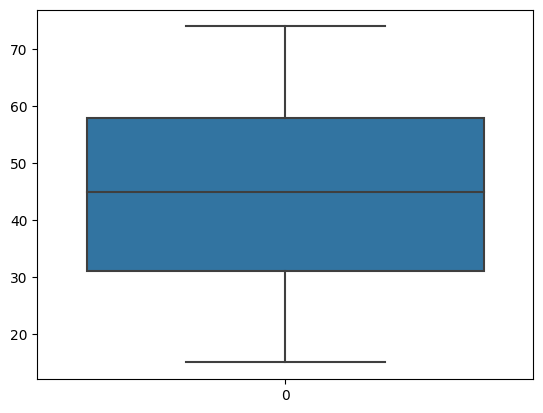

In [10]:
sns.boxplot(df['Age'])

<Axes: >

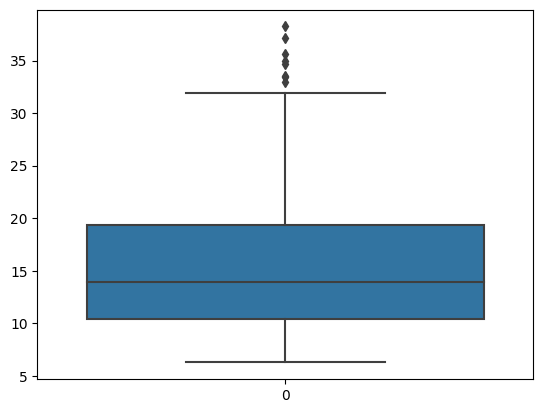

In [11]:
sns.boxplot(df['Na_to_K'])

In [12]:
q1 = df.Na_to_K.quantile(.25)
q3 = df.Na_to_K.quantile(.75)

In [13]:
IQR = q3 - q1
IQR

8.9345

In [14]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

In [15]:
df['Na_to_K'].median()

13.9365

In [16]:
df['Na_to_K'] =np.where(df['Na_to_K']>upper_limit,13.9365,df['Na_to_K'])

<Axes: >

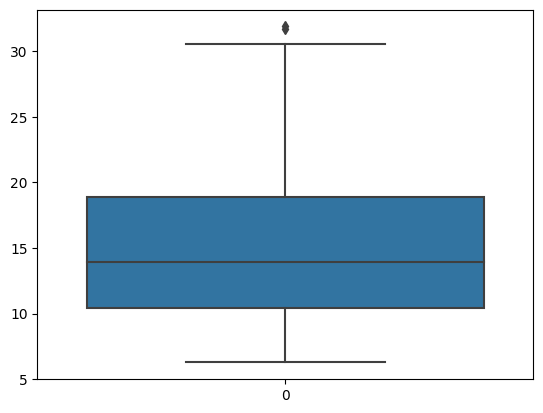

In [17]:
sns.boxplot(df['Na_to_K'])

<Axes: >

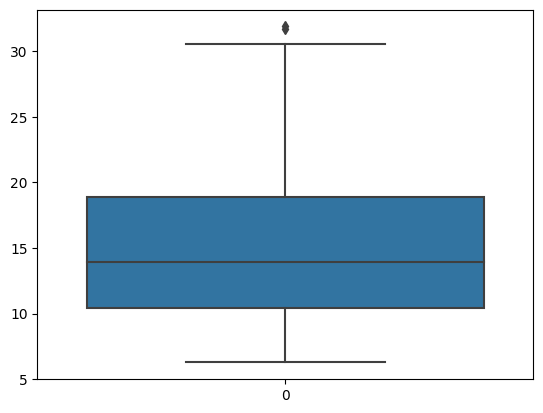

In [18]:
sns.boxplot(df.Na_to_K)

In [19]:
print(upper_limit)

32.78175


In [20]:
df.shape

(200, 6)

In [21]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


<Axes: >

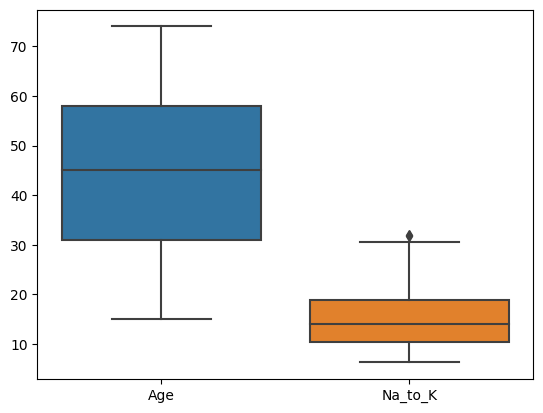

In [23]:
sns.boxplot(df)

In [24]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()

In [27]:
x = df.iloc[:,0:5]
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [28]:
y = df['Drug']
y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [29]:
y = pd.get_dummies(df.iloc[:,5:]).values

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=20)

In [32]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((160, 5), (40, 5), (160, 5), (40, 5))

In [33]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [34]:
xtrain 

,Age,Sex,BP,Cholesterol,Na_to_K
152,55,M,NORMAL,NORMAL,7.261
67,17,M,NORMAL,NORMAL,10.832
133,24,M,NORMAL,HIGH,25.786
59,34,M,HIGH,HIGH,18.703
63,45,M,LOW,NORMAL,8.370
...,...,...,...,...,...
148,61,F,LOW,NORMAL,7.340
137,35,F,HIGH,HIGH,12.894
156,31,M,HIGH,NORMAL,11.227
15,16,F,HIGH,NORMAL,15.516


In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()

In [37]:
xtrain['Sex'] = le.fit_transform(xtrain['Sex'])
xtrain['Sex']

152    1
67     1
133    1
59     1
63     1
      ..
148    0
137    0
156    1
15     0
99     0
Name: Sex, Length: 160, dtype: int64

In [38]:
xtest['Sex'] = le.transform(xtest['Sex'])
xtest['Sex']

150    1
28     0
13     0
178    1
109    1
168    0
177    1
196    1
47     1
195    0
136    0
77     0
187    1
166    0
84     0
175    0
155    1
167    0
121    1
192    1
176    1
113    0
89     0
147    0
185    0
143    1
199    0
126    1
5      0
97     0
34     1
139    0
44     0
72     0
183    0
85     1
149    1
46     0
86     0
112    1
Name: Sex, dtype: int64

In [39]:
xtrain['BP'] = le.fit_transform(xtrain['BP'])
xtrain['BP']

152    2
67     2
133    2
59     0
63     1
      ..
148    1
137    0
156    0
15     0
99     0
Name: BP, Length: 160, dtype: int64

In [40]:
xtest['BP'] = le.transform(xtest['BP'])
xtest['BP']

150    0
28     1
13     1
178    2
109    2
168    1
177    2
196    1
47     1
195    1
136    0
77     0
187    0
166    1
84     1
175    0
155    1
167    2
121    0
192    1
176    0
113    1
89     2
147    0
185    2
143    0
199    1
126    0
5      2
97     0
34     2
139    2
44     2
72     2
183    0
85     0
149    1
46     0
86     2
112    1
Name: BP, dtype: int64

In [41]:
xtrain['Cholesterol'] = le.fit_transform(xtrain['Cholesterol'])
xtrain['Cholesterol']

152    1
67     1
133    0
59     0
63     1
      ..
148    1
137    0
156    1
15     1
99     1
Name: Cholesterol, Length: 160, dtype: int64

In [42]:
xtest['Cholesterol'] = le.transform(xtest['Cholesterol'])
xtest['Cholesterol']

150    1
28     1
13     0
178    0
109    0
168    1
177    0
196    0
47     0
195    0
136    0
77     1
187    0
166    0
84     0
175    0
155    0
167    0
121    1
192    0
176    1
113    1
89     1
147    1
185    1
143    1
199    1
126    0
5      0
97     0
34     0
139    0
44     1
72     0
183    1
85     0
149    0
46     0
86     0
112    1
Name: Cholesterol, dtype: int64

In [145]:
# MOGALAPU JAYA SRIKAR - 20BCE2041

In [43]:
x.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [44]:
xtrain.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K
152,55,1,2,1,7.261
67,17,1,2,1,10.832
133,24,1,2,0,25.786
59,34,1,0,0,18.703
63,45,1,1,1,8.370


In [45]:
xtest.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K
150,49,1,0,1,8.700
28,39,0,1,1,22.697
13,74,0,1,0,20.942
178,39,1,2,0,15.969
109,23,1,2,0,16.850


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [60]:
model = Sequential()
model.add(Dense(8,input_dim=5,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(26,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [61]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 48        
                                                                 
 dense_11 (Dense)            (None, 32)                288       
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 26)                858       
                                                                 
 dense_14 (Dense)            (None, 5)                 135       
                                                                 
Total params: 2,385
Trainable params: 2,385
Non-trainable params: 0
_________________________________________________________________


In [51]:
xtrain.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K
152,55,1,2,1,7.261
67,17,1,2,1,10.832
133,24,1,2,0,25.786
59,34,1,0,0,18.703
63,45,1,1,1,8.370


In [52]:
xtrain

,Age,Sex,BP,Cholesterol,Na_to_K
152,55,1,2,1,7.261
67,17,1,2,1,10.832
133,24,1,2,0,25.786
59,34,1,0,0,18.703
63,45,1,1,1,8.370
...,...,...,...,...,...
148,61,0,1,1,7.340
137,35,0,0,0,12.894
156,31,1,0,1,11.227
15,16,0,0,1,15.516


In [53]:
xtrain_array=xtrain.values
xtrain_array

array([[55.    ,  1.    ,  2.    ,  1.    ,  7.261 ],
       [17.    ,  1.    ,  2.    ,  1.    , 10.832 ],
       [24.    ,  1.    ,  2.    ,  0.    , 25.786 ],
       [34.    ,  1.    ,  0.    ,  0.    , 18.703 ],
       [45.    ,  1.    ,  1.    ,  1.    ,  8.37  ],
       [18.    ,  0.    ,  0.    ,  0.    , 13.9365],
       [42.    ,  1.    ,  0.    ,  1.    , 12.766 ],
       [34.    ,  1.    ,  2.    ,  0.    , 22.456 ],
       [47.    ,  0.    ,  2.    ,  1.    ,  6.683 ],
       [70.    ,  0.    ,  2.    ,  0.    , 20.489 ],
       [43.    ,  1.    ,  1.    ,  0.    , 15.376 ],
       [32.    ,  0.    ,  2.    ,  0.    ,  7.477 ],
       [67.    ,  1.    ,  2.    ,  1.    , 10.898 ],
       [72.    ,  0.    ,  1.    ,  1.    , 14.642 ],
       [37.    ,  0.    ,  0.    ,  1.    , 23.091 ],
       [47.    ,  1.    ,  1.    ,  0.    , 13.093 ],
       [26.    ,  0.    ,  1.    ,  0.    , 14.16  ],
       [60.    ,  1.    ,  0.    ,  0.    , 13.934 ],
       [59.    ,  0.    ,  1

In [54]:
xtest_array=xtest.values
xtest_array

array([[49.   ,  1.   ,  0.   ,  1.   ,  8.7  ],
       [39.   ,  0.   ,  1.   ,  1.   , 22.697],
       [74.   ,  0.   ,  1.   ,  0.   , 20.942],
       [39.   ,  1.   ,  2.   ,  0.   , 15.969],
       [23.   ,  1.   ,  2.   ,  0.   , 16.85 ],
       [51.   ,  0.   ,  1.   ,  1.   , 23.003],
       [25.   ,  1.   ,  2.   ,  0.   , 19.011],
       [16.   ,  1.   ,  1.   ,  0.   , 12.006],
       [68.   ,  1.   ,  1.   ,  0.   , 10.291],
       [56.   ,  0.   ,  1.   ,  0.   , 11.567],
       [55.   ,  0.   ,  0.   ,  0.   , 10.977],
       [26.   ,  0.   ,  0.   ,  1.   , 19.161],
       [47.   ,  1.   ,  0.   ,  0.   , 10.403],
       [58.   ,  0.   ,  1.   ,  0.   , 26.645],
       [47.   ,  0.   ,  1.   ,  0.   , 10.067],
       [73.   ,  0.   ,  0.   ,  0.   , 18.348],
       [49.   ,  1.   ,  1.   ,  0.   , 10.537],
       [57.   ,  0.   ,  2.   ,  0.   , 14.216],
       [15.   ,  1.   ,  0.   ,  1.   , 17.206],
       [72.   ,  1.   ,  1.   ,  0.   , 16.31 ],
       [48.   ,  1. 

In [55]:
ytrain

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0,

In [56]:
ytest

array([[0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]], dtype=uint8)

In [57]:
# MOGALAPU JAYA SRIKAR - 20BCE2041

In [63]:
model.fit(xtrain_array,ytrain,epochs=10,batch_size=5,validation_data=(xtest_array,ytest))

Epoch 1/10
32/32 [==============================] - 1s 9ms/step - loss: 1.2020 - accuracy: 0.5500 - val_loss: 1.3655 - val_accuracy: 0.5500
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 1.1074 - accuracy: 0.5875 - val_loss: 1.1433 - val_accuracy: 0.4500
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 1.0758 - accuracy: 0.5562 - val_loss: 1.2038 - val_accuracy: 0.4750
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.9962 - accuracy: 0.5938 - val_loss: 1.4787 - val_accuracy: 0.5250
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 1.0562 - accuracy: 0.5625 - val_loss: 1.1328 - val_accuracy: 0.5250
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.9514 - accuracy: 0.6250 - val_loss: 1.0935 - val_accuracy: 0.5250
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.9765 - accuracy: 0.5938 - val_loss: 1.1407 - val_accuracy: 0.4500
Epoch 8/10
32/32 [==

In [68]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [69]:
q=model.predict([[25,0,1,0,24.3]])
qpred = np.argmax(q)
qpred
output = df['Drug'].unique()
output[qpred]

1/1 [==============================] - 0s 42ms/step


'DrugY'

In [70]:
q=model.predict([[25,1,0,1,20.3]])
qpred = np.argmax(q)
qpred
output = df['Drug'].unique()
output[qpred]

1/1 [==============================] - 0s 50ms/step


'DrugY'

In [143]:
# MOGALAPU JAYA SRIKAR - 20BCE2041

In [144]:
# METHOD 2
# MOGALAPU JAYA SRIKAR - 20BCE2041

In [73]:
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


<Axes: >

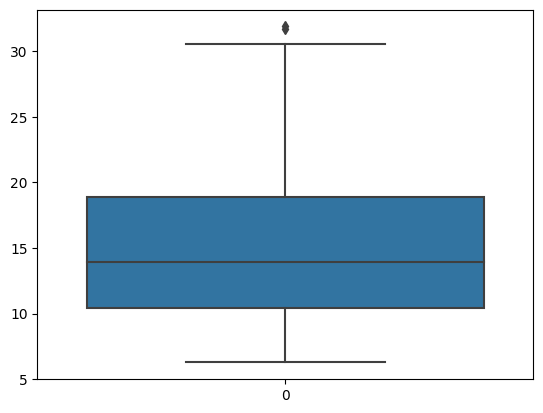

In [74]:
sns.boxplot(df['Na_to_K'])

In [75]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [76]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [77]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [79]:
xone = df.iloc[:,0:5]
xone

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [80]:
yone = df.iloc[:,5:]
yone

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY
...,...
195,drugC
196,drugC
197,drugX
198,drugX


In [82]:
xone.shape

(200, 5)

In [83]:
yone.shape

(200, 1)

In [100]:
xtrainone,xtestone,ytrainone,ytestone = train_test_split(xone,yone,test_size=0.2,random_state=20)

In [96]:
xtrainone.shape, xtestone.shape, ytrainone.shape, ytestone.shape

((160, 5), (40, 5), (160,), (40,))

In [103]:
lencode = LabelEncoder()
ytrainone = lencode.fit_transform(ytrainone)
ytestone = lencode.transform(ytestone)

In [104]:
ytrainone

array([4, 4, 0, 0, 4, 0, 1, 0, 4, 0, 0, 4, 4, 4, 0, 3, 3, 2, 3, 2, 0, 0,
       0, 0, 4, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 4, 0, 4,
       0, 4, 1, 4, 2, 0, 4, 0, 3, 0, 0, 0, 2, 0, 4, 1, 2, 2, 4, 0, 0, 4,
       4, 3, 2, 0, 4, 2, 2, 1, 1, 0, 0, 0, 0, 4, 0, 4, 0, 0, 4, 0, 0, 4,
       0, 1, 4, 0, 0, 0, 0, 0, 1, 4, 2, 0, 4, 3, 4, 4, 0, 0, 4, 0, 2, 3,
       2, 2, 1, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 4, 4, 4, 2, 4, 4, 4, 3, 0,
       4, 3, 4, 1, 1, 1, 0, 0, 0, 0, 0, 3, 1, 4, 1, 4, 0, 0, 1, 4, 0, 0,
       0, 4, 1, 1, 0, 0])

In [105]:
ytestone

array([1, 0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 0, 1, 0, 3, 0, 3, 4, 0, 0, 1, 4,
       0, 1, 0, 0, 4, 0, 4, 0, 4, 4, 4, 4, 0, 2, 3, 1, 4, 4])

In [106]:
df.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC


In [107]:
lencode = LabelEncoder()
xtrainone['Sex'] = lencode.fit_transform(xtrainone['Sex'])
xtestone['Sex'] = lencode.transform(xtestone['Sex'])

In [108]:
xtrainone['Sex']

152    1
67     1
133    1
59     1
63     1
      ..
148    0
137    0
156    1
15     0
99     0
Name: Sex, Length: 160, dtype: int64

In [109]:
xtestone['Sex']

150    1
28     0
13     0
178    1
109    1
168    0
177    1
196    1
47     1
195    0
136    0
77     0
187    1
166    0
84     0
175    0
155    1
167    0
121    1
192    1
176    1
113    0
89     0
147    0
185    0
143    1
199    0
126    1
5      0
97     0
34     1
139    0
44     0
72     0
183    0
85     1
149    1
46     0
86     0
112    1
Name: Sex, dtype: int64

In [110]:
xtrainone

,Age,Sex,BP,Cholesterol,Na_to_K
152,55,1,NORMAL,NORMAL,7.261
67,17,1,NORMAL,NORMAL,10.832
133,24,1,NORMAL,HIGH,25.786
59,34,1,HIGH,HIGH,18.703
63,45,1,LOW,NORMAL,8.370
...,...,...,...,...,...
148,61,0,LOW,NORMAL,7.340
137,35,0,HIGH,HIGH,12.894
156,31,1,HIGH,NORMAL,11.227
15,16,0,HIGH,NORMAL,15.516


In [111]:
xtestone

,Age,Sex,BP,Cholesterol,Na_to_K
150,49,1,HIGH,NORMAL,8.700
28,39,0,LOW,NORMAL,22.697
13,74,0,LOW,HIGH,20.942
178,39,1,NORMAL,HIGH,15.969
109,23,1,NORMAL,HIGH,16.850
168,51,0,LOW,NORMAL,23.003
177,25,1,NORMAL,HIGH,19.011
196,16,1,LOW,HIGH,12.006
47,68,1,LOW,HIGH,10.291
195,56,0,LOW,HIGH,11.567


In [142]:
# MOGALAPU JAYA SRIKAR - 20BCE2041

In [112]:
ytrainone

array([4, 4, 0, 0, 4, 0, 1, 0, 4, 0, 0, 4, 4, 4, 0, 3, 3, 2, 3, 2, 0, 0,
       0, 0, 4, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 4, 0, 4,
       0, 4, 1, 4, 2, 0, 4, 0, 3, 0, 0, 0, 2, 0, 4, 1, 2, 2, 4, 0, 0, 4,
       4, 3, 2, 0, 4, 2, 2, 1, 1, 0, 0, 0, 0, 4, 0, 4, 0, 0, 4, 0, 0, 4,
       0, 1, 4, 0, 0, 0, 0, 0, 1, 4, 2, 0, 4, 3, 4, 4, 0, 0, 4, 0, 2, 3,
       2, 2, 1, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 4, 4, 4, 2, 4, 4, 4, 3, 0,
       4, 3, 4, 1, 1, 1, 0, 0, 0, 0, 0, 3, 1, 4, 1, 4, 0, 0, 1, 4, 0, 0,
       0, 4, 1, 1, 0, 0])

In [113]:
ytestone

array([1, 0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 0, 1, 0, 3, 0, 3, 4, 0, 0, 1, 4,
       0, 1, 0, 0, 4, 0, 4, 0, 4, 4, 4, 4, 0, 2, 3, 1, 4, 4])

In [114]:
lencode = LabelEncoder()
xtrainone['BP'] = lencode.fit_transform(xtrainone['BP'])
xtestone['BP'] = lencode.transform(xtestone['BP'])

In [115]:
lencode = LabelEncoder()
xtrainone['Cholesterol'] = lencode.fit_transform(xtrainone['Cholesterol'])
xtestone['Cholesterol'] = lencode.transform(xtestone['Cholesterol'])

In [116]:
xtrainone

,Age,Sex,BP,Cholesterol,Na_to_K
152,55,1,2,1,7.261
67,17,1,2,1,10.832
133,24,1,2,0,25.786
59,34,1,0,0,18.703
63,45,1,1,1,8.370
...,...,...,...,...,...
148,61,0,1,1,7.340
137,35,0,0,0,12.894
156,31,1,0,1,11.227
15,16,0,0,1,15.516


In [117]:
xtestone

,Age,Sex,BP,Cholesterol,Na_to_K
150,49,1,0,1,8.700
28,39,0,1,1,22.697
13,74,0,1,0,20.942
178,39,1,2,0,15.969
109,23,1,2,0,16.850
168,51,0,1,1,23.003
177,25,1,2,0,19.011
196,16,1,1,0,12.006
47,68,1,1,0,10.291
195,56,0,1,0,11.567


In [120]:
modelone = Sequential()
modelone.add(Dense(5,activation='relu'))
modelone.add(Dense(32,activation='relu'))
modelone.add(Dense(32,activation='relu'))
modelone.add(Dense(26,activation='relu'))
modelone.add(Dense(5,activation='softmax'))

In [121]:
modelone.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [122]:
modelone.fit(xtrainone,ytrainone,epochs=10,batch_size=5,validation_data=(xtestone,ytestone))

Epoch 1/10
32/32 [==============================] - 1s 9ms/step - loss: 4.3106 - accuracy: 0.3562 - val_loss: 1.9673 - val_accuracy: 0.5000
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 1.5250 - accuracy: 0.5188 - val_loss: 1.4127 - val_accuracy: 0.5000
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 1.2081 - accuracy: 0.5562 - val_loss: 1.2714 - val_accuracy: 0.4500
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 1.1873 - accuracy: 0.5312 - val_loss: 1.2428 - val_accuracy: 0.4500
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 1.1252 - accuracy: 0.5437 - val_loss: 1.2664 - val_accuracy: 0.4250
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 1.0620 - accuracy: 0.5688 - val_loss: 1.2598 - val_accuracy: 0.4250
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 1.0859 - accuracy: 0.5750 - val_loss: 1.3512 - val_accuracy: 0.4500
Epoch 8/10
32/32 [==

In [124]:
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [125]:
xtrainone

,Age,Sex,BP,Cholesterol,Na_to_K
152,55,1,2,1,7.261
67,17,1,2,1,10.832
133,24,1,2,0,25.786
59,34,1,0,0,18.703
63,45,1,1,1,8.370
...,...,...,...,...,...
148,61,0,1,1,7.340
137,35,0,0,0,12.894
156,31,1,0,1,11.227
15,16,0,0,1,15.516


In [127]:
ytrainone

array([4, 4, 0, 0, 4, 0, 1, 0, 4, 0, 0, 4, 4, 4, 0, 3, 3, 2, 3, 2, 0, 0,
       0, 0, 4, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 4, 0, 4,
       0, 4, 1, 4, 2, 0, 4, 0, 3, 0, 0, 0, 2, 0, 4, 1, 2, 2, 4, 0, 0, 4,
       4, 3, 2, 0, 4, 2, 2, 1, 1, 0, 0, 0, 0, 4, 0, 4, 0, 0, 4, 0, 0, 4,
       0, 1, 4, 0, 0, 0, 0, 0, 1, 4, 2, 0, 4, 3, 4, 4, 0, 0, 4, 0, 2, 3,
       2, 2, 1, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 4, 4, 4, 2, 4, 4, 4, 3, 0,
       4, 3, 4, 1, 1, 1, 0, 0, 0, 0, 0, 3, 1, 4, 1, 4, 0, 0, 1, 4, 0, 0,
       0, 4, 1, 1, 0, 0])

In [141]:
# MOGALAPU JAYA SRIKAR - 20BCE2041

In [123]:
qone=modelone.predict([[25,0,1,0,24.3]])
print(qone)
qpredone = np.argmax(qone)
print(qpredone)
outputone = df['Drug'].unique()
outputone[qpredone]

1/1 [==============================] - 0s 134ms/step
[[9.6845323e-01 1.7258964e-02 5.9690705e-04 5.3162719e-03 8.3746323e-03]]
0


'DrugY'

In [128]:
qone=modelone.predict([[47,1,2,1,18.703]])
print(qone)
qpredone = np.argmax(qone)
print(qpredone)
outputone = df['Drug'].unique()
outputone[qpredone]

1/1 [==============================] - 0s 42ms/step
[[0.6665739  0.11222102 0.04489734 0.03960859 0.13669911]]
0


'DrugY'

In [129]:
qone=modelone.predict([[55,1,2,1,7.261]])
print(qone)
qpredone = np.argmax(qone)
print(qpredone)
outputone = df['Drug'].unique()
outputone[qpredone]

1/1 [==============================] - 0s 40ms/step
[[0.02068768 0.06381929 0.452494   0.10277978 0.36021924]]
2


'drugX'

In [131]:
qone=modelone.predict([[47,0,2,0,11.767]])
print(qone)
qpredone = np.argmax(qone)
print(qpredone)
outputone = df['Drug'].unique()
outputone[qpredone]

1/1 [==============================] - 0s 51ms/step
[[0.23335454 0.16472553 0.21920998 0.06569754 0.31701243]]
4


'drugB'

In [132]:
qone=modelone.predict([[35,1,2,0,17.234]])
print(qone)
qpredone = np.argmax(qone)
print(qpredone)
outputone = df['Drug'].unique()
outputone[qpredone]

1/1 [==============================] - 0s 48ms/step
[[0.7406457  0.0884281  0.02554779 0.04884252 0.0965359 ]]
0


'DrugY'

In [133]:
qone=modelone.predict([[71,1,0,1,11.767]])
print(qone)
qpredone = np.argmax(qone)
print(qpredone)
outputone = df['Drug'].unique()
outputone[qpredone]

1/1 [==============================] - 0s 41ms/step
[[0.01695919 0.05918753 0.4991106  0.06030054 0.36444217]]
2


'drugX'

In [134]:
qone=modelone.predict([[60,0,0,0,13.767]])
print(qone)
qpredone = np.argmax(qone)
print(qpredone)
outputone = df['Drug'].unique()
outputone[qpredone]

1/1 [==============================] - 0s 42ms/step
[[0.12871371 0.1430275  0.3306825  0.04784152 0.3497347 ]]
4


'drugB'

In [135]:
qone=modelone.predict([[40,0,1,0,9.167]])
print(qone)
qpredone = np.argmax(qone)
print(qpredone)
outputone = df['Drug'].unique()
outputone[qpredone]

1/1 [==============================] - 0s 43ms/step
[[0.1596747  0.16596766 0.27380502 0.07953709 0.32101557]]
4


'drugB'

In [136]:
qone=modelone.predict([[30,1,1,0,14.3]])
print(qone)
qpredone = np.argmax(qone)
print(qpredone)
outputone = df['Drug'].unique()
outputone[qpredone]

1/1 [==============================] - 0s 43ms/step
[[0.6235585  0.1204365  0.04637054 0.07153714 0.1380973 ]]
0


'DrugY'

In [137]:
qone=modelone.predict([[20,1,1,1,21.3]])
print(qone)
qpredone = np.argmax(qone)
print(qpredone)
outputone = df['Drug'].unique()
outputone[qpredone]

1/1 [==============================] - 0s 47ms/step
[[0.94247645 0.03013705 0.0015383  0.01083493 0.01501331]]
0


'DrugY'

In [138]:
# MOGALAPU JAYA SRIKAR - 20BCE2041

In [139]:
# MOGALAPU JAYA SRIKAR - 20BCE2041

In [140]:
# MOGALAPU JAYA SRIKAR - 20BCE2041